<a href="https://colab.research.google.com/github/realbluesnail/UNCC_DSBA6188/blob/main/DSBA6188_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
import os
import nltk.corpus


In [ ]:
# Sample text for performing tokenization
text = "Tokenization is a fundamental step in natural language processing (NLP) that breaks text into smaller units, called tokens, to make it easier for machines to process. Tokens can be words, phrases, characters, or other significant components of text. The goal of tokenization is to create a small representation of text that a machine learning model can understand."
#text = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
# Importing word_tokenize from nltk
from nltk.tokenize import word_tokenize

# Get the tokenizer to divide text into sentences
nltk.download('punkt_tab')

# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Tokenization',
 'is',
 'a',
 'fundamental',
 'step',
 'in',
 'natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'that',
 'breaks',
 'text',
 'into',
 'smaller',
 'units',
 ',',
 'called',
 'tokens',
 ',',
 'to',
 'make',
 'it',
 'easier',
 'for',
 'machines',
 'to',
 'process',
 '.',
 'Tokens',
 'can',
 'be',
 'words',
 ',',
 'phrases',
 ',',
 'characters',
 ',',
 'or',
 'other',
 'significant',
 'components',
 'of',
 'text',
 '.',
 'The',
 'goal',
 'of',
 'tokenization',
 'is',
 'to',
 'create',
 'a',
 'small',
 'representation',
 'of',
 'text',
 'that',
 'a',
 'machine',
 'learning',
 'model',
 'can',
 'understand',
 '.']

In [ ]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({',': 5, 'a': 3, 'text': 3, 'to': 3, '.': 3, 'of': 3, 'is': 2, 'that': 2, 'can': 2, 'Tokenization': 1, ...})

In [ ]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[(',', 5),
 ('a', 3),
 ('text', 3),
 ('to', 3),
 ('.', 3),
 ('of', 3),
 ('is', 2),
 ('that', 2),
 ('can', 2),
 ('Tokenization', 1)]

In [ ]:
# To save and read data files from your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temp_df = pd.DataFrame(fdist1)
temp_df.info()
temp_df.to_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10 non-null     object
 1   1       10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
#podcast_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/top_podcasts.csv')
tw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweeter_training.csv', encoding='ISO-8859-1', header=None)


In [ ]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
tw_df.columns = column_names
tw_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
text_samples = " ".join(text for text in tw_df['text'].sample(frac = 0.1, random_state=23))
wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(text_samples)

(-0.5, 799.5, 399.5, -0.5)

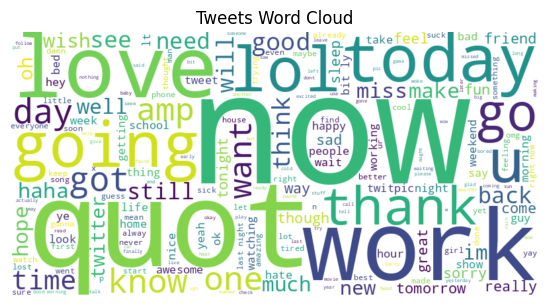

In [ ]:
# Display the generated image using matplotlib
plt.figure(figsize=(15, 7.5))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation='bilinear')
plt.title('Tweets Word Cloud')
plt.axis("off")